In [ ]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from openTSNE import TSNE
import seaborn as sns
from matplotlib.colors import ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Normalization of input
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#Reshaping the images to 1D vectors
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [4]:
#AutoEncoder model - Functional
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)


decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

2025-04-13 17:52:36.968299: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [6]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.3432 - val_loss: 0.1702
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1613 - val_loss: 0.1403
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1358 - val_loss: 0.1254
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1249 - val_loss: 0.1186
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1185 - val_loss: 0.1135
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1142 - val_loss: 0.1095
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1102 - val_loss: 0.1067
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1073 - val_loss: 0.1040
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1049 - val_loss: 0.1028
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1031 - val_loss: 0.1005
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1019 - val_loss: 0.0995
Epoch 12/100
235/235 ━━━━━━━━━

In [7]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 667,154 (2.54 MB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 444,770 (1.70 MB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


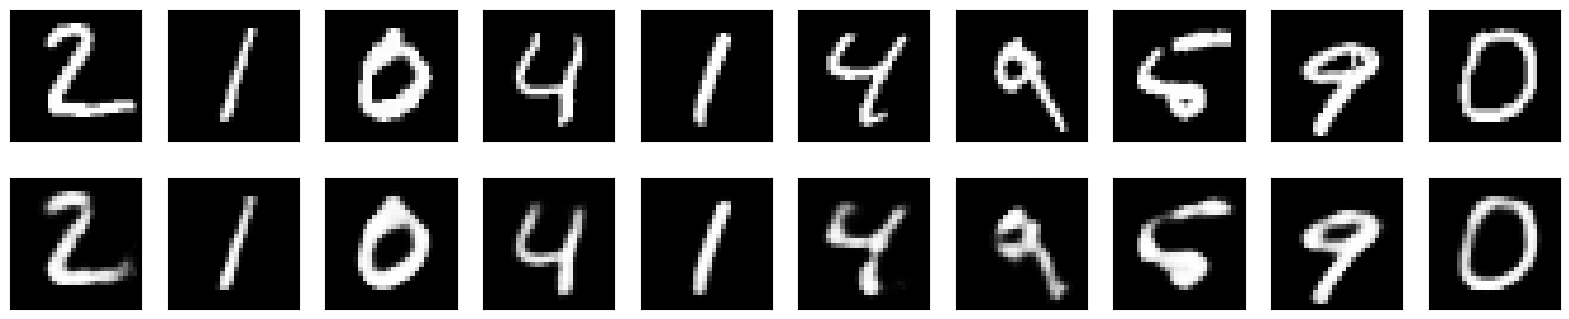

In [8]:
#Visualize the outputs
import matplotlib.pyplot as plt

decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [9]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)
encoded = layers.Dense(16, activation='relu')(encoded)
encoded = layers.Dense(8, activation='relu')(encoded)
encoded = layers.Dense(4, activation='relu')(encoded)
encoded = layers.Dense(2, activation='relu')(encoded)

decoded = layers.Dense(4, activation='relu')(encoded)
decoded = layers.Dense(8, activation='relu')(decoded)
decoded = layers.Dense(16, activation='relu')(decoded)
decoded = layers.Dense(32, activation='relu')(decoded)
decoded = layers.Dense(64, activation='relu')(decoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [10]:
model = keras.Model(input_img, decoded)
model.compile(optimizer='adam', loss='binary_crossentropy')

In [11]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 223,834 (874.35 KB)

 Trainable params: 223,834 (874.35 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.5208 - val_loss: 0.2434
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2405 - val_loss: 0.2332
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2318 - val_loss: 0.2279
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2279 - val_loss: 0.2258
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.2261 - val_loss: 0.2238
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.2244 - val_loss: 0.2218
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.2218 - val_loss: 0.2198
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.2202 - val_loss: 0.2181
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.2192 - val_loss: 0.2170
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.2171 - val_loss: 0.2161
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.2161 - val_loss: 0.2159
Epoch 12/100
235/235 ━━━━━━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


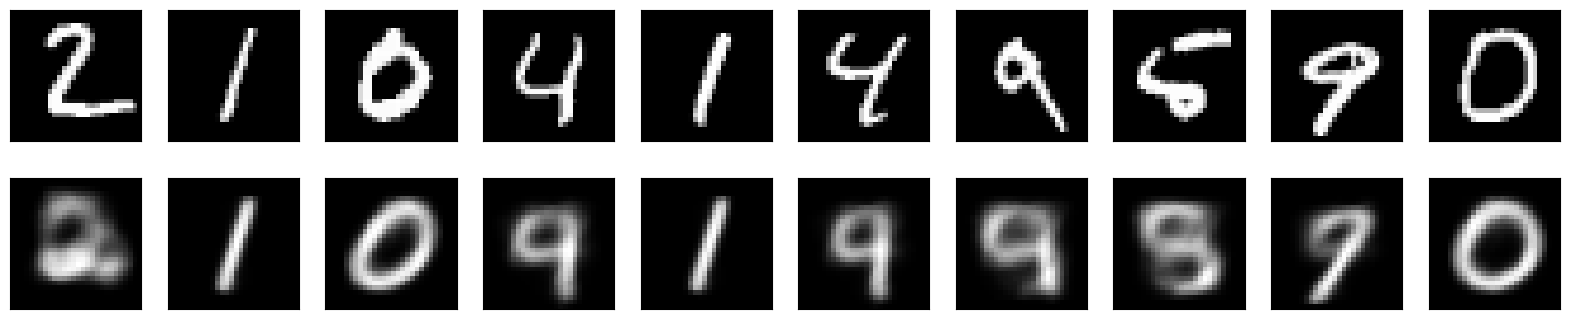

In [13]:
import matplotlib.pyplot as plt

decoded_imgs = model.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [14]:
dim_2_model = keras.Model(model.input, model.layers[7].output)

In [16]:
indices = np.random.choice(x_test.shape[0], 1000, replace = False)

sample = x_test[indices]

sample_y = y_test[indices]




In [22]:
cmap = ListedColormap(sns.husl_palette(len(np.unique(sample_y))))

In [20]:
dim_2d = dim_2_model.predict(sample)
dim_2d

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


array([[  2.5164938,   6.4589896],
       [ 10.490455 ,  15.01962  ],
       [  0.5798867,   5.3038263],
       ...,
       [  6.537785 ,   8.752211 ],
       [  2.1271424,   6.7071977],
       [ 64.16416  , 111.13191  ]], dtype=float32)

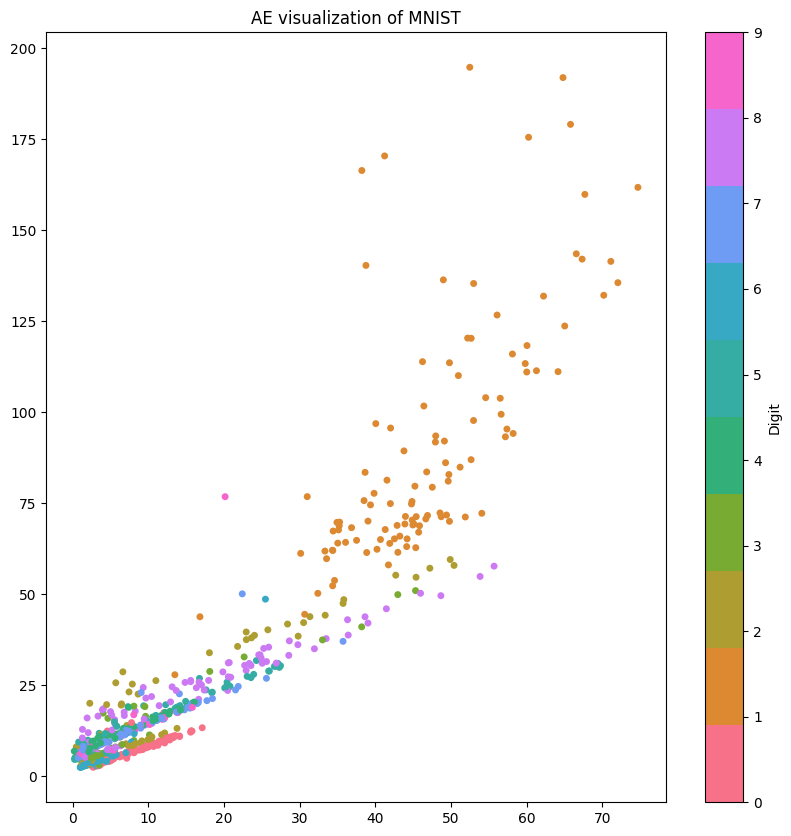

In [23]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
ax.set_title('AE visualization of MNIST')

im = ax.scatter(dim_2d[:,0], dim_2d[:,1], s=25, c=sample_y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')

In [24]:
# Introducing noise in the data
(x_train, _), (x_test, _) = mnist.load_data()

#Normalize
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#Reshape
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#add NOISE - adding noise with random normal distribution
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

print(x_train.shape)
print(x_train_noisy.shape)
print(x_test.shape)
print(x_test_noisy.shape)

(60000, 784)
(60000, 784)
(10000, 784)
(10000, 784)


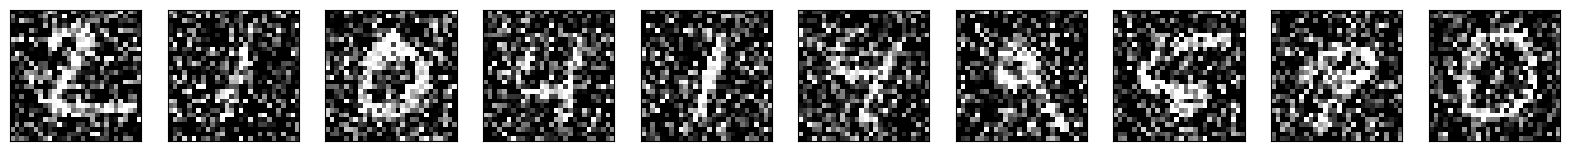

In [25]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [26]:
#AutoEncoder model
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

# Compile and Fit
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train_noisy, x_train, # NOTE: input is noisy, output is non-noisy
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.3337 - val_loss: 0.2051
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1929 - val_loss: 0.1702
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1663 - val_loss: 0.1570
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1562 - val_loss: 0.1504
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.1499 - val_loss: 0.1444
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1437 - val_loss: 0.1406
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1400 - val_loss: 0.1368
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1371 - val_loss: 0.1347
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1347 - val_loss: 0.1336
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1325 - val_loss: 0.1317
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1314 - val_loss: 0.1297
Epoch 12/100
235/235 ━━━━━━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


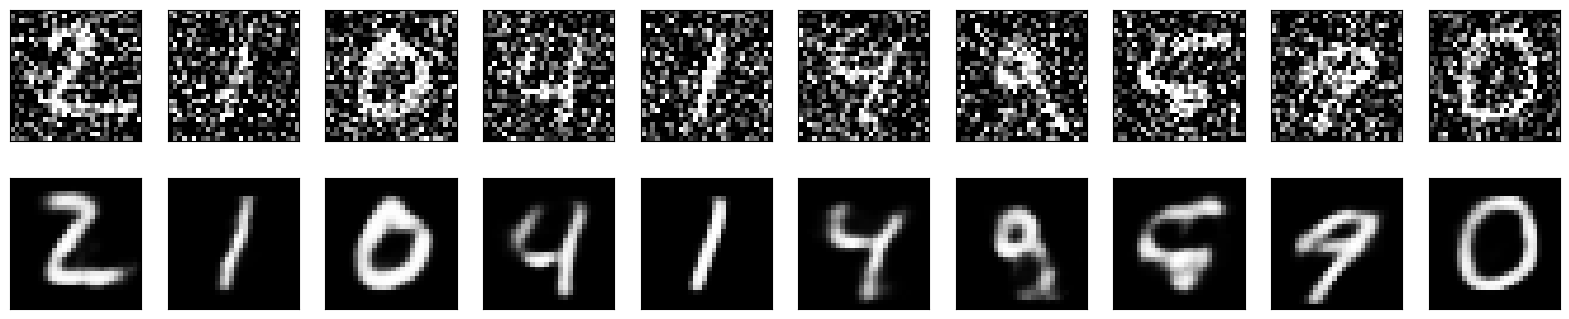

In [27]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [28]:
!gdown 1EsPvxcp5lzdltC3yLar1_laArmk9RZpw
!gdown 1DgdthLfHLIq3AnS4YAa1bne-OM90oHoD

Downloading...
From: https://drive.google.com/uc?id=1EsPvxcp5lzdltC3yLar1_laArmk9RZpw
To: /root/workspace/PracticeProjects/learnings/neural_networks/ratings.csv
100%|██████████████████████████████████████| 2.48M/2.48M [00:00<00:00, 8.30MB/s]
Downloading...
From: https://drive.google.com/uc?id=1DgdthLfHLIq3AnS4YAa1bne-OM90oHoD
To: /root/workspace/PracticeProjects/learnings/neural_networks/movies.csv
100%|████████████████████████████████████████| 516k/516k [00:00<00:00, 3.23MB/s]


In [34]:
ratings = pd.read_csv('../../data/ratings.csv')
ratings.shape

(105339, 4)

In [35]:
ratings.movieId.unique().shape

(10325,)

In [36]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [37]:
rm = ratings.pivot(index='movieId', columns='userId', values='rating').fillna(0)

In [38]:
rm.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,5.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,4.0,5.0,3.0,0.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5


In [39]:
(rm > 0).sum().sum() / (rm.shape[0] * rm.shape[1])

np.float64(0.015272940801206305)

In [40]:
train, val = train_test_split(rm, test_size = 0.2)
train.shape, val.shape

((8260, 668), (2065, 668))

In [41]:
X_train = train.values
X_val = val.values

In [42]:
input_movie = keras.Input(shape=(668,))
encoded = layers.Dense(512, activation='relu')(input_movie)
encoded = layers.Dense(256, activation='relu')(encoded)
encoded = layers.Dense(128, activation='relu')(encoded)


decoded = layers.Dense(256, activation='relu')(encoded)
decoded = layers.Dense(512, activation='relu')(decoded)
decoded = layers.Dense(668, activation='linear')(decoded)


autoencoder = keras.Model(input_movie, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [43]:
autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(X_val, X_val))

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.1777 - val_loss: 0.1579
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1492 - val_loss: 0.1412
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.1293 - val_loss: 0.1314
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.1172 - val_loss: 0.1263
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.1127 - val_loss: 0.1214
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ -0s -4215us/step - loss: 0.1096 - val_loss: 0.1173
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0999 - val_loss: 0.1154
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0943 - val_loss: 0.1119
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0923 - val_loss: 0.1105
Epoch 10/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0882 - val_loss: 0.1081
Epoch 11/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0824 - val_loss: 0.1072
Epoch 12/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/

In [46]:
intermediate_model = keras.Model(autoencoder.input, autoencoder.layers[3].output)

embeddings = intermediate_model.predict(rm.values)
embeddings[10]

323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([ 0.        ,  9.866794  ,  6.1660314 ,  5.1540465 ,  0.        ,
        0.        ,  0.        ,  6.242322  ,  2.5434983 ,  0.        ,
        2.799921  ,  0.        ,  5.4789524 ,  1.4383616 ,  0.        ,
        0.        ,  2.5746148 ,  0.        ,  6.440117  ,  2.0131578 ,
        0.        ,  0.        ,  5.0760436 ,  0.        ,  0.        ,
        2.4184616 ,  0.        ,  8.688886  ,  0.        ,  0.        ,
        5.4675894 ,  0.20138846, 16.199717  ,  2.8114772 ,  0.        ,
        0.        ,  0.        ,  0.        ,  8.756736  ,  1.1315815 ,
        0.        ,  2.9764616 ,  1.3697778 ,  1.7797031 ,  3.7358027 ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.7626697 ,
        4.1722245 ,  0.        ,  0.        ,  0.29214346, 13.011223  ,
        0.        ,  0.        ,  0.38254908,  0.        ,  3.126436  ,
        0.        ,  1.5308253 ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  4.5345464 ,  0.        ,  5.17

In [47]:
similarity_matrix = cosine_similarity(embeddings)

similarity_matrix.shape

(10325, 10325)

In [48]:
item_sim_matrix = pd.DataFrame(similarity_matrix, index=rm.index, columns=rm.index)
item_sim_matrix.head() #Item-similarity Matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,144482,144656,144976,146344,146656,146684,146878,148238,148626,149532
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.747670,0.690962,0.631814,0.792323,0.613590,0.712151,0.637734,0.585868,0.597546,...,0.628362,0.586241,0.619700,0.629873,0.582193,0.537476,0.557680,0.597108,0.583479,0.577849
2,0.747670,1.000000,0.689805,0.709620,0.770663,0.691387,0.698400,0.730467,0.682494,0.756413,...,0.729122,0.723690,0.686216,0.749603,0.744455,0.673470,0.688757,0.729718,0.706076,0.719029
3,0.690962,0.689805,1.000000,0.733077,0.876981,0.647088,0.748257,0.723605,0.765714,0.570485,...,0.673771,0.641843,0.665273,0.660853,0.668148,0.644278,0.645253,0.646634,0.640675,0.638392
4,0.631814,0.709620,0.733077,1.000000,0.742559,0.716115,0.693082,0.790030,0.765559,0.653871,...,0.690206,0.702413,0.745465,0.726089,0.692296,0.706085,0.713312,0.708076,0.702976,0.698276
5,0.792323,0.770663,0.876981,0.742559,1.000000,0.648621,0.874009,0.756861,0.726862,0.673620,...,0.680968,0.677251,0.720051,0.703421,0.678097,0.582975,0.591152,0.683487,0.690786,0.672765


In [50]:
movies = pd.read_csv('../../data/movies.csv')

In [51]:
movies[movies.title.str.contains('Liar Liar')]

,movieId,title,genres
1202,1485,Liar Liar (1997),Comedy


In [52]:
item_sim_matrix[1485].sort_values(ascending=False).head(10)

movieId
1485    1.000000
1407    0.870596
104     0.867463
1731    0.844006
1391    0.840366
1777    0.837511
1608    0.837126
7918    0.831897
2158    0.831675
1476    0.831151
Name: 1485, dtype: float32

### Similar movies of Liar Liar

In [53]:
movie_index = item_sim_matrix[1485].sort_values(ascending=False).head(10).index
movies[movies.movieId.isin(movie_index)]


,movieId,title,genres
94,104,Happy Gilmore (1996),Comedy
1130,1391,Mars Attacks! (1996),Action|Comedy|Sci-Fi
1143,1407,Scream (1996),Comedy|Horror|Mystery|Thriller
1195,1476,Private Parts (1997),Comedy|Drama
1202,1485,Liar Liar (1997),Comedy
1287,1608,Air Force One (1997),Action|Thriller
1373,1731,Mr. Magoo (1997),Comedy
1398,1777,"Wedding Singer, The (1998)",Comedy|Romance
1713,2158,"Henry: Portrait of a Serial Killer, Part 2 (1998)",Crime|Horror
5508,7918,"Indian Runner, The (1991)",Drama
